In [4]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# I. Explore the dataset. 

In [5]:
transactions  = pd.read_csv('transactions.csv', sep=';', parse_dates=True)
train = pd.read_csv('train_set.csv', sep=';')
codes = pd.read_csv('codes.csv', sep=';')
types = pd.read_csv('types.csv',sep=';')

In [6]:
transactions['day'] = transactions['datetime'].apply(lambda day: day.split(' ')[0])
transactions['time'] = transactions['datetime'].apply(lambda day: day.split(' ')[1])
transactions['time'] = pd.to_datetime(transactions['time'],format= '%H:%M:%S' ).dt.time
transactions['hour']=transactions['time'].apply(lambda hour:hour.hour)
transactions=pd.merge(transactions, train, how ='left', on ='client_id')
transactions.dropna(inplace=True)
transactions.head()

client_id      datetime  code  type        sum  day      time  hour  target
0   96372458  421 06:33:15  6011  2010 -561478.94  421  06:33:15     6     0.0
2   21717441   55 13:38:47  6011  2010  -44918.32   55  13:38:47    13     0.0
4   85302434  151 10:34:12  4814  1030   -3368.87  151  10:34:12    10     0.0
5   31421357  398 00:00:00  5411  1110   -1572.14  398  00:00:00     0     0.0
6   84826852  423 15:27:55  6010  7070    5654.99  423  15:27:55    15     1.0

In [7]:
transactions.shape

(91826, 9)

In [8]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91826 entries, 0 to 130038
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  91826 non-null  int64  
 1   datetime   91826 non-null  object 
 2   code       91826 non-null  int64  
 3   type       91826 non-null  int64  
 4   sum        91826 non-null  float64
 5   day        91826 non-null  object 
 6   time       91826 non-null  object 
 7   hour       91826 non-null  int64  
 8   target     91826 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 7.0+ MB


In [9]:
transactions.describe()

client_id          code          type           sum          hour  \
count  9.182600e+04  91826.000000  91826.000000  9.182600e+04  91826.000000   
mean   5.169368e+07   5596.441389   2549.483403 -1.666997e+04     11.662220   
std    2.839945e+07    602.144814   2295.581132  6.232297e+05      6.230136   
min    2.289900e+04    742.000000   1010.000000 -4.150030e+07      0.000000   
25%    2.736051e+07   5251.000000   1030.000000 -2.156079e+04      8.000000   
50%    5.388370e+07   5661.000000   1110.000000 -5.239160e+03     12.000000   
75%    7.552189e+07   6010.000000   2370.000000 -1.122960e+03     16.000000   
max    9.999124e+07   9402.000000   8145.000000  6.737747e+07     23.000000   

             target  
count  91826.000000  
mean       0.491266  
std        0.499926  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [10]:
len(transactions.client_id.unique())

6000

In [11]:
len(transactions.type.value_counts())

61

## Transactions


<table>
  <thead>
    <tr>
      <th>Field</th>
      <th>description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>client_id</td>
      <td>unique ID for client</td>
    </tr>
    <tr>
      <td>datetime</td>
      <td>Day and time of the transaction</td>
    </tr>
     <tr>
      <td>code</td>
      <td>transaction code </td>
    </tr>
    <tr>
      <td>type</td>
      <td>transaction type</td>
    </tr>
        <tr>
      <td>sum</td>
      <td>sum of transaction</td>
    </tr>
  </tbody>
</table>

## Type

<table>
  <thead>
    <tr>
      <th>Field</th>
      <th>description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>type</td>
      <td>unique ID for type_description</td>
    </tr>
    <tr>
      <td>type_description</td>
      <td>description</td>
    </tr>
  </tbody>
</table>

## codes

<table>
  <thead>
    <tr>
      <th>Field</th>
      <th>description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>	code	</td>
      <td>unique ID for code_description</td>
    </tr>
    <tr>
      <td>code_description</td>
      <td>description</td>
  </tbody>
</table>

## train set

<table>
  <thead>
    <tr>
      <th>Field</th>
      <th>description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>client_id	</td>
      <td>unique ID for сlient</td>
    </tr>
    <tr>
      <td>target</td>
      <td>client gender</td>
  </tbody>
</table>

## visualizations

<AxesSubplot:xlabel='day', ylabel='sum'>

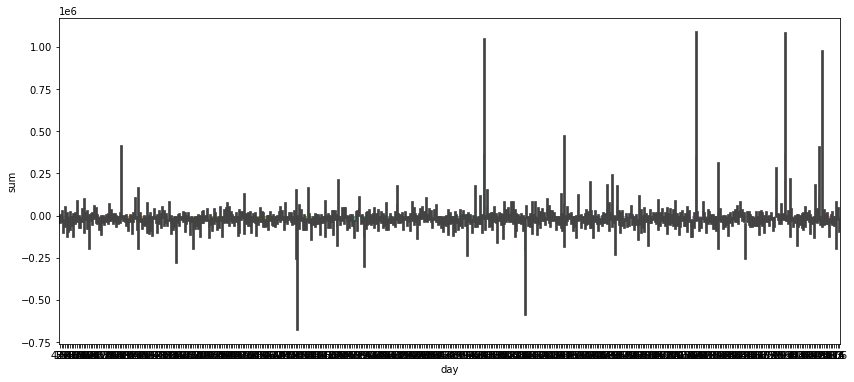

In [12]:
plt.figure(figsize=(14,6))
sns.barplot(x=transactions['day'],y=transactions['sum'])

In [13]:
transactions.sort_values(by=['code'])

client_id      datetime  code  type        sum  day      time  hour  \
3500       815836  307 09:05:59   742  1110   -3368.87  307  09:05:59     9   
21878    76380054   71 00:00:00   742  1110   -5772.00   71  00:00:00     0   
112272   79610861  240 00:00:00   742  1110  -24400.30  240  00:00:00     0   
11946    75555017  421 00:00:00  1711  1110 -125052.59  421  00:00:00     0   
66289    48803462   54 00:00:00  1799  1110 -366084.27   54  00:00:00     0   
...           ...           ...   ...   ...        ...  ...       ...   ...   
52       67267524  428 00:00:00  9399  1100  -39839.63  428  00:00:00     0   
16895    12646472  387 09:20:30  9399  1100  -13026.31  387  09:20:30     9   
23341    68389637  294 00:00:00  9399  1100  -12273.93  294  00:00:00     0   
96116    74331777   28 00:00:00  9399  1100  -22459.16   28  00:00:00     0   
90341     7219212  103 12:22:16  9402  1110  -71397.66  103  12:22:16    12   

        target  
3500       1.0  
21878      0.0  
112272     0.0  
11946      1.0  
66289      0.0  
...        ...  
52         1.0  
16895      1.0  
23341      1.0  
96116      1.0  
90341      1.0  

[91826 rows x 9 columns]

In [14]:
train.head()

client_id  target
0   75063019       0
1   86227647       1
2    6506523       0
3   50615998       0
4   95213230       0

In [15]:
train.shape

(6000, 2)

In [16]:
pd.set_option('display.max_rows', 50000)
pd.set_option('display.max_columns', 50000)
pd.set_option('display.width', 100000)
codes

code                                   code_description
0    5944  Магазины по продаже часов, ювелирных изделий и...
1    5621                           Готовые сумочные изделия
2    5697       Услуги по переделке, починке и пошиву одежды
3    7995                       Транзакции по азартным играм
4    5137             Мужская, женская и детская спец-одежда
5    5964          Прямой маркетинг — торговля через каталог
6    7210                                            Таймшер
7    5949             Магазины ткани, ниток рукоделия, шитья
8    5199  Товары недлительного пользования, не классифиц...
9    5072  Оборудование и сопутствующие материалы для тех...
10   5921  Магазины с продажей спиртных напитков на вынос...
11   6051  Не-финансовые институты — иностранная валюта, ...
12   4812  Телекоммуникационное оборудование, включая про...
13   7512                                 Прокат автомобилей
14   5993                                  Табачные магазины
15   4215  Услуги курьера — по воздуху и на земле, агентс...
16   5122             Лекарства, их распространители, аптеки
17   5942                                   Книжные магазины
18   7221                                         Фотостудии
19   5733  Продажа музыкальных инструментов, фортепиано, нот
20   5131  Штучные товары, галантерея и другие текстильны...
21   5261  Садовые принадлежности (в том числе для ухода ...
22   5947   Магазины открыток, подарков, новинок и сувениров
23   5722                               Бытовое оборудование
24   8062                                           Больницы
25   5441                                       Кондитерские
26   5094  Драгоценные камни и металлы, часы и ювелирные ...
27   7299                                        Иной сервис
28   5599                                 Продажа снегоходов
29   7298                                    Центры здоровья
30   7699                                       Общий ремонт
31   7273                                   Службы знакомств
32   5969  Прямой маркетинг — другие торговые точки прямо...
33   5511  Легковой и грузовой транспорт — продажа, серви...
34   6300  Продажа страхования, гарантированное размещени...
35   7338                       Услуги копировальных центров
36   7372  Программирование, обработка данных, интегриров...
37   7278                         Сервисы по покупке/продаже
38   5532                                           Автошины
39   5950              Магазины хрусталя и изделий из стекла
40   7395                        Фотостудии, фотолаборатории
41   8398  Организации благотворительные и общественные с...
42   6211                      Ценные бумаги: брокеры/дилеры
43   7829            Производство и дистрибуция видеофильмов
44   5651                              Одежда для всей семьи
45   5193  Оборудование для выращивания растений, инвента...
46   5968         Прямой маркетинг — торговые точки подписки
47   5912                                             Аптеки
48   5735                               Магазины звукозаписи
49   5816                              Цифровые товары, игры
50   5541                            Станции техобслуживания
51   7011   Отели, мотели, базы отдыха, сервисы бронирования
52   5462                                           Булочные
53   5172                              Нефть и нефтепродукты
54   7531  Станции технического обслуживания для автомоби...
55   5943  Магазины офисных, школьных принадлежностей, ка...
56   5300                                           Оптовики
57   4789  Услуги по транспортировке — нигде более не кла...
58   4131                                   Автобусные линии
59   7538                              СТО общего назначения
60   8220  Колледжи, университеты, профессиональные школы...
61   7932                                     Билльярд-клубы
62   4722   Туристические агентства и организаторы экскурсий
63   5734     Продажа компьютерного программного обеспечения
64   8299                             Об

In [17]:
pd.set_option('display.max_rows', 50000)
pd.set_option('display.max_columns', 50000)
pd.set_option('display.width', 100000)
types


type                                   type_description
0      8001                 Установление расх. лимита по карте
1      2411  Перевод с карты на счет др.лица в одном тер. б...
2      4035                                    н/д(нет данных)
3      3001            Комиссия за обслуживание ссудного счета
4      2420  Перевод с карты на счет физ.лица в другом тер....
5      1210                             Покупка. POS  Зарубеж.
6      7050   Пополнение счета на сумму причисленных процентов
7      8140                       Операции по утраченной карте
8      6000                                 Возврат  покупки. 
9      1200                                 Покупка. Зарубеж. 
10     6210                      Возврат покупки.POS Зарубеж. 
11     4210        Плата за получение наличных в АТМ. Зарубеж.
12     8220  Плата за обработку счета банковской карты клие...
13     2321                           Платеж с карты через ВСП
14     2432  Перевод с карты на счет физ.лица в другом банк...
15     2440                                                н/д
16     2360                                                н/д
17     8035                             Списание. Счет закрыт.
18     4083           Оплата услуг банка по поручению автомат.
19     1310                                                н/д
20     7010       Взнос наличных через АТМ (в своем тер.банке)
21     7070  Перевод на карту (с карты) через Мобильный бан...
22     2410  Перевод с карты на счет др.лица в одном тер. б...
23     2990                             Списание по требованию
24     7081               Перевод/пополнение со счета на карту
25     2341  Списание с карты по операции “перевода с карты...
26     4051  Плата за перевод на карту (с карты) через АТМ ...
27     2421  Перевод с карты на счет физ.лица в другом тер....
28     4000          Плата за получение наличных в офисе банка
29     6100                                  Возврат  покупки.
30     3200  Плата за предоставление услуг посредством моби...
31     2400      Перевод средств с карты на счет клиента в ВСП
32     3120                Плата за досрочный перевыпуск карты
33     2900     Выдача наличных средств без предъявления карты
34     4061     Плата за перевод на карту (с карты) через POS 
35     2353  Погашение кредита с карты через мобильное прил...
36     4100                      Плата за получение наличных. 
37     7000                       Пополнение счета в подразд. 
38     3210  Плата за предоставление отчета по счету карты ...
39     4600                                                н/д
40     7034  Перевод на карту/ с карты через АТМ (без взима...
41   999999                                                XXX
42     4080                       Оплата услуг банка через ВСП
43     7075  Перевод с карты на карту в овердрафте через Мо...
44     2370  Списание с карты на карту по операции <перевод...
45     2330  Списание с карты по операции “перевода с карты...
46     2350      Погашение кредита (в пределах одного филиала)
47     2992  Списание средств для погашения задолженности п...
48     8230  Плата за предоставление по запросу клиента док...
49     2340  Списание с карты по операции “перевода с карты...
50     7060  Пополнение счета для погашения задолженности п...
51     7101  Межфилиальные перечисления процентов по счету ...
52     1030                           Оплата услуги. Банкоматы
53     4081                       Оплата услуг банка через АТМ
54     4090                                                н/д
55     8210                    Плата за приост. действия карты
56     1000                                           Покупка.
57     7100               Межфилиальные перечисления процентов
58     4021  Плата за получение наличных через POS в банке ...
59     2331  Списание с карты по операции “перевода с карты...
60     3810                                                н/д
61     4010            Плата за получение наличных в АТМ банка
62     7014  Взнос наличных через АТМ 

In [18]:
types[types['type'] == 2370]

type                                   type_description
44  2370  Списание с карты на карту по операции <перевод...

How we determined the date

In [19]:
transactions['day']=transactions['day'].astype(int)
transactions['day'].max()

456

In [76]:
df2 = transactions['day'].value_counts(ascending=True)

In [77]:
df2.head(457)

153     67
154    102
149    140
142    156
141    184
146    195
145    195
143    196
148    202
152    214
144    218
147    226
150    233
151    248
Name: day, dtype: int64

In [75]:
transactions=transactions[(transactions['day']>140) & (transactions['day']<155)]
uni=transactions.groupby('day')
op=uni.count().datetime
op.to_frame()
op['day'] = op.index
op

day
141                                                  184
142                                                  156
143                                                  196
144                                                  218
145                                                  195
146                                                  195
147                                                  226
148                                                  202
149                                                  140
150                                                  233
151                                                  248
152                                                  214
153                                                   67
154                                                  102
day    Int64Index([141, 142, 143, 144, 145, 146, 147,...
Name: datetime, dtype: object

In [22]:
import datetime as dt

In [23]:
transactions.sort_values('day',inplace=True)
norm_dates=[]
date = dt.datetime(2014,7,31)
for i in range(457): 
    date += dt.timedelta(days=1)
    for j in transactions['day'].sort_values():
        if i==j:
            norm_dates.append(date)

In [24]:
len(norm_dates)

91826

In [25]:
transactions['validdate']=norm_dates

In [26]:
transactions['day']

92184       0
66542       0
78805       0
2481        0
128750      0
         ... 
11652     456
105146    456
65463     456
57736     456
105557    456
Name: day, Length: 91826, dtype: int32

In [27]:
transactions['day'].head(500)

92184     0
66542     0
78805     0
2481      0
128750    0
129832    0
45378     0
13047     0
6708      0
19997     0
101400    0
118230    0
128221    0
25174     0
72507     0
25138     0
25131     0
19918     0
105942    0
68688     0
92545     0
50883     0
79901     0
23525     0
77218     0
111263    0
39783     0
94880     0
45237     0
109735    0
28979     0
45445     0
62970     0
118607    0
70004     0
12146     0
52484     0
15404     0
45701     0
3780      0
58892     0
4479      0
74962     0
96220     0
35224     0
22926     0
48298     0
69517     0
1384      0
32741     0
46630     0
94434     0
118423    0
114840    0
114363    0
111448    0
34440     0
35993     0
46740     0
59397     0
48341     0
81365     0
81819     0
79876     0
110855    0
73434     0
61682     0
14077     0
27032     0
5213      0
68068     0
68039     0
120636    0
76904     0
95193     0
44859     0
102087    0
33273     0
54646     0
82181     0
44665     0
44667     0
54397     0
1038

In [28]:
transactions

client_id      datetime  code  type        sum  day      time  hour  target  validdate
92184    91212486    0 18:07:24  6010  7070   44918.32    0  18:07:24    18     0.0 2014-08-01
66542    66875893    0 16:27:28  5411  1010  -18618.64    0  16:27:28    16     1.0 2014-08-01
78805    70780820    0 13:39:56  6010  7070   18663.56    0  13:39:56    13     1.0 2014-08-01
2481      3323243    0 10:32:40  6011  2010  -11229.58    0  10:32:40    10     1.0 2014-08-01
128750   45421659    0 10:19:12  6011  2010 -112295.79    0  10:19:12    10     1.0 2014-08-01
...           ...           ...   ...   ...        ...  ...       ...   ...     ...        ...
11652    29041434  456 09:03:24  6010  7070   50622.94  456  09:03:24     9     1.0 2015-10-31
105146   20200542  456 15:27:56  5661  1010  -89904.01  456  15:27:56    15     0.0 2015-10-31
65463      168767  456 19:18:50  5411  1010   -4716.42  456  19:18:50    19     1.0 2015-10-31
57736    78490146  456 13:36:53  4814  1030   -5232.98  456  13:36:53    13     0.0 2015-10-31
105557   96998453  456 00:00:00  5411  1110   -4020.19  456  00:00:00     0     0.0 2015-10-31

[91826 rows x 10 columns]

<AxesSubplot:xlabel='hour', ylabel='count'>

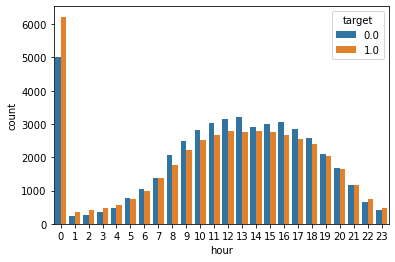

In [29]:
sns.countplot(data=transactions,x='hour',hue='target')

In [30]:
transactions['category'] = 'неизвестно'
transactions.loc[transactions.code == 5094, 'category'] = 'Ювелирные изделия'
transactions.loc[transactions.code == 5944, 'category'] = 'Ювелирные изделия'
transactions.loc[transactions.code == 5611, 'category'] = 'Для мужсчин'
transactions.loc[transactions.code == 5094, 'category'] = 'Для мужсчин'
transactions.loc[transactions.code == 5631, 'category'] = 'Для женщин'
transactions.loc[transactions.code == 5977, 'category'] = 'Для женщин'
transactions.loc[transactions.code == 5621, 'category'] = 'Для женщин'
transactions.loc[transactions.code == 7995, 'category'] = 'Азарт'
transactions.loc[transactions.code == 5641, 'category'] = 'Одежда'
transactions.loc[transactions.code == 5699, 'category'] = 'Одежда'
transactions.loc[transactions.code == 5661, 'category'] = 'Одежда'
transactions.loc[transactions.code == 5655, 'category'] = 'Одежда'
transactions.loc[transactions.code == 5691, 'category'] = 'Одежда'
transactions.loc[transactions.code == 5651, 'category'] = 'Одежда'
transactions.loc[transactions.code == 5137, 'category'] = 'Одежда'
transactions.loc[transactions.code == 5697, 'category'] = 'Одежда'
transactions.loc[transactions.code == 5967, 'category'] = 'Маркетинг'
transactions.loc[transactions.code == 5965, 'category'] = 'Маркетинг'
transactions.loc[transactions.code == 5968, 'category'] = 'Маркетинг'
transactions.loc[transactions.code == 5969, 'category'] = 'Маркетинг'
transactions.loc[transactions.code == 5964, 'category'] = 'Маркетинг'
transactions.loc[transactions.code == 7991, 'category'] = 'отдых'
transactions.loc[transactions.code == 7999, 'category'] = 'отдых'
transactions.loc[transactions.code == 4411, 'category'] = 'отдых'
transactions.loc[transactions.code == 4722, 'category'] = 'отдых'
transactions.loc[transactions.code == 7011, 'category'] = 'отдых'
transactions.loc[transactions.code == 7210, 'category'] = 'отдых'
transactions.loc[transactions.code == 5192, 'category'] = '1000 Мелочей'
transactions.loc[transactions.code == 5131, 'category'] = '1000 Мелочей'
transactions.loc[transactions.code == 5949, 'category'] = '1000 Мелочей'
transactions.loc[transactions.code == 5199, 'category'] = '1000 Мелочей'
transactions.loc[transactions.code == 179, 'category'] = 'Техника'
transactions.loc[transactions.code == 5045, 'category'] = 'Техника'
transactions.loc[transactions.code == 5047, 'category'] = 'Техника'
transactions.loc[transactions.code == 7841, 'category'] = 'Техника'
transactions.loc[transactions.code == 7993, 'category'] = 'Техника'
transactions.loc[transactions.code == 5074, 'category'] = 'Техника'
transactions.loc[transactions.code == 5065, 'category'] = 'Техника'
transactions.loc[transactions.code == 7629, 'category'] = 'Техника'
transactions.loc[transactions.code == 5085, 'category'] = 'Техника'
transactions.loc[transactions.code == 5541, 'category'] = 'Техника'
transactions.loc[transactions.code == 5816, 'category'] = 'Техника'
transactions.loc[transactions.code == 7699, 'category'] = 'Техника'
transactions.loc[transactions.code == 5722, 'category'] = 'Техника'
transactions.loc[transactions.code == 4812, 'category'] = 'Техника'
transactions.loc[transactions.code == 5072, 'category'] = 'Техника'

transactions.loc[transactions.code == 5813, 'category'] = 'Алкоголь'

transactions.loc[transactions.code == 4829, 'category'] = 'финансовые и денежные переводы'
transactions.loc[transactions.code == 6010, 'category'] = 'финансовые и денежные переводы'
transactions.loc[transactions.code == 6536, 'category'] = 'финансовые и денежные переводы'
transactions.loc[transactions.code == 9311, 'category'] = 'финансовые и денежные переводы'
transactions.loc[transactions.code == 6011, 'category'] = 'финансовые и денежные переводы'
transactions.loc[transactions.code == 6051, 'category'] = 'финансовые и денежные переводы'

transactions.loc[transactions.code == 5542, 'category'] = 'авто'
transactions.loc[transactions.code == 5013, 'category'] = 'авто'
transactions.loc[transactions.code == 5571, 'category'] = 'авто'
transactions.loc[transactions.code == 7523, 'category'] = 'авто'
transactions.loc[transactions.code == 3351, 'category'] = 'авто'
transactions.loc[transactions.code == 7542, 'category'] = 'авто'
transactions.loc[transactions.code == 5533, 'category'] = 'авто'
transactions.loc[transactions.code == 7538, 'category'] = 'авто'
transactions.loc[transactions.code == 4131, 'category'] = 'авто'
transactions.loc[transactions.code == 4789, 'category'] = 'авто'
transactions.loc[transactions.code == 7531, 'category'] = 'авто'
transactions.loc[transactions.code == 5532, 'category'] = 'авто'
transactions.loc[transactions.code == 5511, 'category'] = 'авто'
transactions.loc[transactions.code == 5599, 'category'] = 'авто'
transactions.loc[transactions.code == 7512, 'category'] = 'авто'


transactions.loc[transactions.code == 4214, 'category'] = 'Курьерская служба'
transactions.loc[transactions.code == 4215, 'category'] = 'Курьерская служба'


transactions.loc[transactions.code == 8021, 'category'] = 'Здоровье'
transactions.loc[transactions.code == 5976, 'category'] = 'Здоровье'
transactions.loc[transactions.code == 8099, 'category'] = 'Здоровье'
transactions.loc[transactions.code == 8043, 'category'] = 'Здоровье'
transactions.loc[transactions.code == 8011, 'category'] = 'Здоровье'
transactions.loc[transactions.code == 8071, 'category'] = 'Здоровье'
transactions.loc[transactions.code == 5912, 'category'] = 'Здоровье'
transactions.loc[transactions.code == 7298, 'category'] = 'Здоровье'
transactions.loc[transactions.code == 8062, 'category'] = 'Здоровье'
transactions.loc[transactions.code == 5122, 'category'] = 'Здоровье'

transactions.loc[transactions.code == 8244, 'category'] = 'Учеба'
transactions.loc[transactions.code == 5111, 'category'] = 'Здоровье'
transactions.loc[transactions.code == 8220, 'category'] = 'Здоровье'
transactions.loc[transactions.code == 5943, 'category'] = 'Здоровье'
transactions.loc[transactions.code == 8299, 'category'] = 'Здоровье'
transactions.loc[transactions.code == 5942, 'category'] = 'Здоровье'

transactions.loc[transactions.code == 7922, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 8999, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 4816, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 6513, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 9402, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 4784, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 6012, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 7841, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 4899, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 4121, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 9399, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 7216, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 4900, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 7311, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 7399, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 8398, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 7395, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 7278, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 7338, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 6300, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 7273, 'category'] = 'Услуги и сервисы'
transactions.loc[transactions.code == 7221, 'category'] = 'Услуги и сервисы'

transactions.loc[transactions.code == 5200, 'category'] = 'Дом'
transactions.loc[transactions.code == 5719, 'category'] = 'Дом'
transactions.loc[transactions.code == 5714, 'category'] = 'Дом'
transactions.loc[transactions.code == 5712, 'category'] = 'Дом'
transactions.loc[transactions.code == 5231, 'category'] = 'Дом'

transactions.loc[transactions.code == 5814, 'category'] = 'Еда'
transactions.loc[transactions.code == 5812, 'category'] = 'Еда'
transactions.loc[transactions.code == 5462, 'category'] = 'Еда'
transactions.loc[transactions.code == 5462, 'category'] = 'Еда'

transactions.loc[transactions.code == 7375, 'category'] = 'айти'
transactions.loc[transactions.code == 5734, 'category'] = 'айти'
transactions.loc[transactions.code == 7372, 'category'] = 'айти'

transactions.loc[transactions.code == 6211, 'category'] = 'Дилеры'
transactions.loc[transactions.code == 5994, 'category'] = 'Дилеры'

transactions.loc[transactions.code == 7997, 'category'] = 'Развлечения'
transactions.loc[transactions.code == 7832, 'category'] = 'Развлечения'
transactions.loc[transactions.code == 7996, 'category'] = 'Развлечения'
transactions.loc[transactions.code == 7933, 'category'] = 'Развлечения'
transactions.loc[transactions.code == 7932, 'category'] = 'Развлечения'
transactions.loc[transactions.code == 5735, 'category'] = 'Развлечения'
transactions.loc[transactions.code == 7829, 'category'] = 'Развлечения'

transactions.loc[transactions.code == 3000, 'category'] = 'Транспортировка'
transactions.loc[transactions.code == 4111, 'category'] = 'Транспортировка'
transactions.loc[transactions.code == 511, 'category'] = 'Транспортировка'
transactions.loc[transactions.code == 4112, 'category'] = 'Транспортировка'

transactions.loc[transactions.code == 4814, 'category'] = 'Звонки'


transactions.loc[transactions.code == 5950, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5949, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5733, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5947, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 2741, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5732, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5946, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5999, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5681, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5411, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5940, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5309, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5331, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5310, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5311, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5931, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5945, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5941, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5399, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5499, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5970, 'category'] = 'Различные магазины'
transactions.loc[transactions.code == 5681, 'category'] = 'Различные магазины'

transactions.loc[transactions.code == 5211, 'category'] = 'Строительство'
transactions.loc[transactions.code == 5039, 'category'] = 'Строительство'
transactions.loc[transactions.code == 5713, 'category'] = 'Строительство'
transactions.loc[transactions.code == 1799, 'category'] = 'Строительство'
transactions.loc[transactions.code == 1711, 'category'] = 'Строительство'
transactions.loc[transactions.code == 1731, 'category'] = 'Строительство'

transactions.loc[transactions.code == 742, 'category'] = 'Зоо'
transactions.loc[transactions.code == 5995, 'category'] = 'Зоо'

transactions.loc[transactions.code == 5451, 'category'] = 'Продукты'
transactions.loc[transactions.code == 5422, 'category'] = 'Продукты'

transactions.loc[transactions.code == 9222, 'category'] = 'Штрафы'

In [31]:
transactions

client_id      datetime  code  type        sum  day      time  hour  target  validdate                        category
92184    91212486    0 18:07:24  6010  7070   44918.32    0  18:07:24    18     0.0 2014-08-01  финансовые и денежные переводы
66542    66875893    0 16:27:28  5411  1010  -18618.64    0  16:27:28    16     1.0 2014-08-01              Различные магазины
78805    70780820    0 13:39:56  6010  7070   18663.56    0  13:39:56    13     1.0 2014-08-01  финансовые и денежные переводы
2481      3323243    0 10:32:40  6011  2010  -11229.58    0  10:32:40    10     1.0 2014-08-01  финансовые и денежные переводы
128750   45421659    0 10:19:12  6011  2010 -112295.79    0  10:19:12    10     1.0 2014-08-01  финансовые и денежные переводы
...           ...           ...   ...   ...        ...  ...       ...   ...     ...        ...                             ...
11652    29041434  456 09:03:24  6010  7070   50622.94  456  09:03:24     9     1.0 2015-10-31  финансовые и денежные переводы
105146   20200542  456 15:27:56  5661  1010  -89904.01  456  15:27:56    15     0.0 2015-10-31                          Одежда
65463      168767  456 19:18:50  5411  1010   -4716.42  456  19:18:50    19     1.0 2015-10-31              Различные магазины
57736    78490146  456 13:36:53  4814  1030   -5232.98  456  13:36:53    13     0.0 2015-10-31                          Звонки
105557   96998453  456 00:00:00  5411  1110   -4020.19  456  00:00:00     0     0.0 2015-10-31              Различные магазины

[91826 rows x 11 columns]

In [32]:
from datetime import date
import calendar
my_date = date.today()
calendar.day_name[my_date.weekday()] 
transactions['day of the week'] = transactions['validdate'].apply(lambda day: calendar.day_name[day.weekday()])

In [33]:
transactions

client_id      datetime  code  type        sum  day      time  hour  target  validdate                        category day of the week
92184    91212486    0 18:07:24  6010  7070   44918.32    0  18:07:24    18     0.0 2014-08-01  финансовые и денежные переводы          Friday
66542    66875893    0 16:27:28  5411  1010  -18618.64    0  16:27:28    16     1.0 2014-08-01              Различные магазины          Friday
78805    70780820    0 13:39:56  6010  7070   18663.56    0  13:39:56    13     1.0 2014-08-01  финансовые и денежные переводы          Friday
2481      3323243    0 10:32:40  6011  2010  -11229.58    0  10:32:40    10     1.0 2014-08-01  финансовые и денежные переводы          Friday
128750   45421659    0 10:19:12  6011  2010 -112295.79    0  10:19:12    10     1.0 2014-08-01  финансовые и денежные переводы          Friday
...           ...           ...   ...   ...        ...  ...       ...   ...     ...        ...                             ...             ...
11652    29041434  456 09:03:24  6010  7070   50622.94  456  09:03:24     9     1.0 2015-10-31  финансовые и денежные переводы        Saturday
105146   20200542  456 15:27:56  5661  1010  -89904.01  456  15:27:56    15     0.0 2015-10-31                          Одежда        Saturday
65463      168767  456 19:18:50  5411  1010   -4716.42  456  19:18:50    19     1.0 2015-10-31              Различные магазины        Saturday
57736    78490146  456 13:36:53  4814  1030   -5232.98  456  13:36:53    13     0.0 2015-10-31                          Звонки        Saturday
105557   96998453  456 00:00:00  5411  1110   -4020.19  456  00:00:00     0     0.0 2015-10-31              Различные магазины        Saturday

[91826 rows x 12 columns]

In [34]:
transactions['month']=transactions['validdate'].apply(lambda month:month.month)

In [35]:
transactions

client_id      datetime  code  type        sum  day      time  hour  target  validdate                        category day of the week  month
92184    91212486    0 18:07:24  6010  7070   44918.32    0  18:07:24    18     0.0 2014-08-01  финансовые и денежные переводы          Friday      8
66542    66875893    0 16:27:28  5411  1010  -18618.64    0  16:27:28    16     1.0 2014-08-01              Различные магазины          Friday      8
78805    70780820    0 13:39:56  6010  7070   18663.56    0  13:39:56    13     1.0 2014-08-01  финансовые и денежные переводы          Friday      8
2481      3323243    0 10:32:40  6011  2010  -11229.58    0  10:32:40    10     1.0 2014-08-01  финансовые и денежные переводы          Friday      8
128750   45421659    0 10:19:12  6011  2010 -112295.79    0  10:19:12    10     1.0 2014-08-01  финансовые и денежные переводы          Friday      8
...           ...           ...   ...   ...        ...  ...       ...   ...     ...        ...                             ...             ...    ...
11652    29041434  456 09:03:24  6010  7070   50622.94  456  09:03:24     9     1.0 2015-10-31  финансовые и денежные переводы        Saturday     10
105146   20200542  456 15:27:56  5661  1010  -89904.01  456  15:27:56    15     0.0 2015-10-31                          Одежда        Saturday     10
65463      168767  456 19:18:50  5411  1010   -4716.42  456  19:18:50    19     1.0 2015-10-31              Различные магазины        Saturday     10
57736    78490146  456 13:36:53  4814  1030   -5232.98  456  13:36:53    13     0.0 2015-10-31                          Звонки        Saturday     10
105557   96998453  456 00:00:00  5411  1110   -4020.19  456  00:00:00     0     0.0 2015-10-31              Различные магазины        Saturday     10

[91826 rows x 13 columns]

In [36]:
transactions['year']=transactions['validdate'].apply(lambda year:year.year)

<AxesSubplot:xlabel='month', ylabel='sum'>

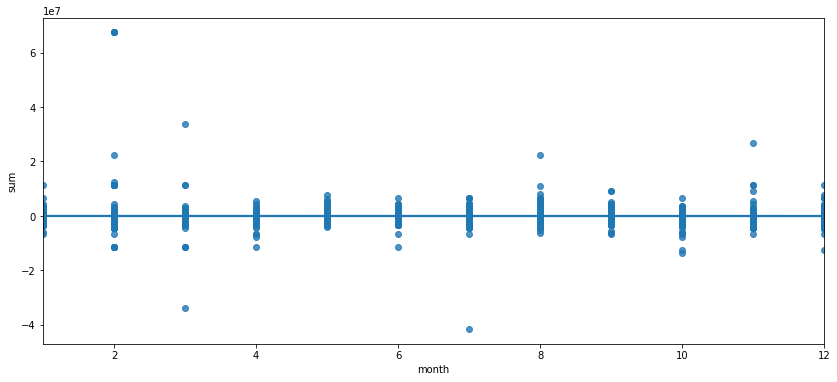

In [37]:
plt.figure(figsize=(14,6))
sns.regplot(x=transactions['month'],y=transactions['sum'])

<Figure size 1008x432 with 0 Axes>

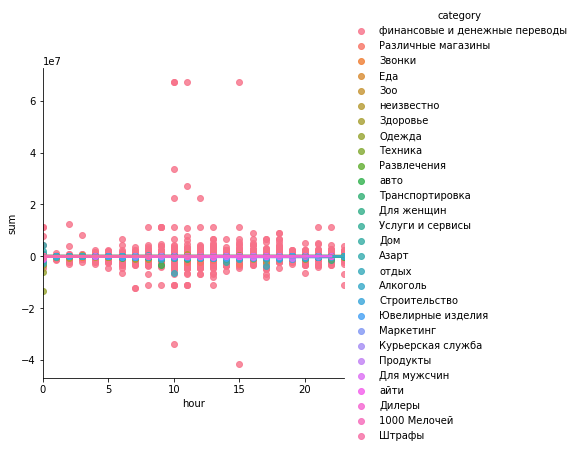

In [38]:
plt.figure(figsize=(14,6))
sns.lmplot(x='hour', y='sum', hue='category', data=transactions)

In [39]:
test6=transactions[transactions['category']=='Азарт']
test6


client_id      datetime  code  type         sum  day      time  hour  target  validdate category day of the week  month  year
24900    38714155    1 00:00:00  7995  1200    -6984.80    1  00:00:00     0     1.0 2014-08-02    Азарт        Saturday      8  2014
9218     66679335    4 00:00:00  7995  1100   -11229.58    4  00:00:00     0     1.0 2014-08-05    Азарт         Tuesday      8  2014
59315    38714155    4 00:00:00  7995  1200   -21336.20    4  00:00:00     0     1.0 2014-08-05    Азарт         Tuesday      8  2014
39834    53708094    5 00:00:00  7995  1200   -89836.63    5  00:00:00     0     1.0 2014-08-06    Азарт       Wednesday      8  2014
919      24419000    5 00:00:00  7995  1100    -4491.83    5  00:00:00     0     0.0 2014-08-06    Азарт       Wednesday      8  2014
83086    53708094    6 00:00:00  7995  1200   -44918.32    6  00:00:00     0     1.0 2014-08-07    Азарт        Thursday      8  2014
55773    93533984    8 00:00:00  7995  1200  -112295.79    8  00:00:00     0     1.0 2014-08-09    Азарт        Saturday      8  2014
87175    62258087   11 00:00:00  7995  1200   -21884.20   11  00:00:00     0     1.0 2014-08-12    Азарт         Tuesday      8  2014
121749   24419000   13 00:00:00  7995  1100    -5614.79   13  00:00:00     0     0.0 2014-08-14    Азарт        Thursday      8  2014
95919    29298771   13 05:33:30  7995  1100    -1122.96   13  05:33:30     5     0.0 2014-08-14    Азарт        Thursday      8  2014
59499    53708094   18 00:00:00  7995  1200   -44918.32   18  00:00:00     0     1.0 2014-08-19    Азарт         Tuesday      8  2014
96669    96913237   21 00:00:00  7995  1200   -44918.32   21  00:00:00     0     1.0 2014-08-22    Азарт          Friday      8  2014
123690   38714155   25 00:00:00  7995  1200    -2245.92   25  00:00:00     0     1.0 2014-08-26    Азарт         Tuesday      8  2014
28521    89729753   27 00:00:00  7995  1200    -5322.82   27  00:00:00     0     1.0 2014-08-28    Азарт        Thursday      8  2014
17159    85841930   27 00:00:00  7995  1200   -25333.03   27  00:00:00     0     1.0 2014-08-28    Азарт        Thursday      8  2014
1377     62258087   31 00:00:00  7995  1200   -42302.05   31  00:00:00     0     1.0 2014-09-01    Азарт          Monday      9  2014
11043    93533984   31 00:00:00  7995  1200   -67377.47   31  00:00:00     0     1.0 2014-09-01    Азарт          Monday      9  2014
81555    93533984   34 00:00:00  7995  1200   -22459.16   34  00:00:00     0     1.0 2014-09-04    Азарт        Thursday      9  2014
36124    88546834   35 00:00:00  7995  1200   -21336.20   35  00:00:00     0     1.0 2014-09-05    Азарт          Friday      9  2014
105890   93533984   40 00:00:00  7995  1200   -40426.48   40  00:00:00     0     1.0 2014-09-10    Азарт       Wednesday      9  2014
109355   38714155   41 00:00:00  7995  1200    -5614.79   41  00:00:00     0     1.0 2014-09-11    Азарт        Thursday      9  2014
95852    10678387   41 00:00:00  7995  1200  -112295.79   41  00:00:00     0     1.0 2014-09-11    Азарт        Thursday      9  2014
45233    38714155   43 00:00:00  7995  1200   -16844.37   43  00:00:00     0     1.0 2014-09-13    Азарт        Saturday      9  2014
216      54584863   50 21:07:55  7995  1200   -25233.99   50  21:07:55    21     1.0 2014-09-20    Азарт        Saturday      9  2014
102754    7935433   51 00:00:00  7995  1200    -8983.66   51  00:00:00     0     1.0 2014-09-21    Азарт          Sunday      9  2014
29715    38714155   51 00:00:00  7995  1200    -2245.92   51  00:00:00     0     1.0 2014-09-21    Азарт          Sunday      9  2014
87043    38077192   52 07:36:20  7995  1100    -2021.32   52  07:36:20     7     1.0 2014-09-22    Азарт          Monday      9  2014
90233    10678387   54 00:00:00  7995  1200   -22459.16   54  00:00:00     0     1.0 2014-09-24    Азарт       Wednesday      9  2014
51311     1567291   57 00:00:00  7995  1100     -673.77   57  00:00:00     0     1.0 2014-09-27    Азарт        Saturday  

<AxesSubplot:xlabel='hour', ylabel='sum'>

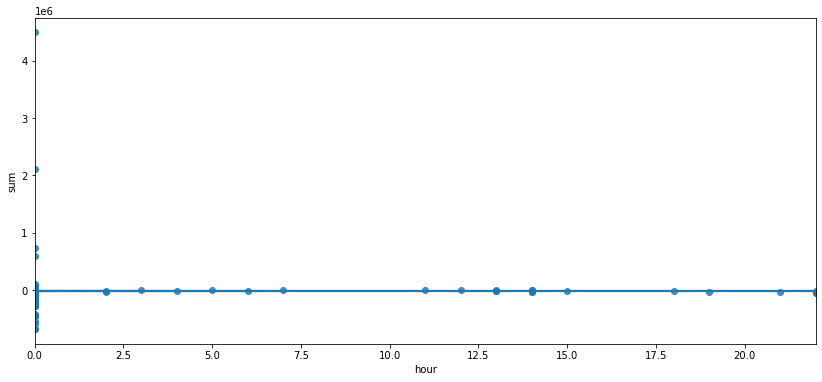

In [40]:
plt.figure(figsize=(14,6))
sns.regplot(x=test6['hour'], y=test6['sum'])

<AxesSubplot:xlabel='hour', ylabel='sum'>

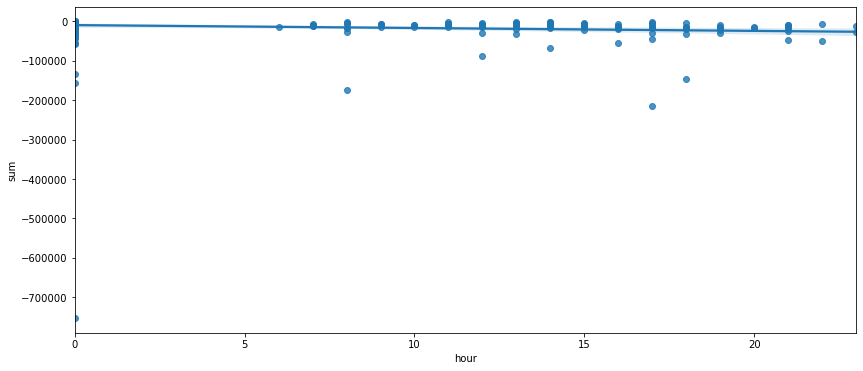

In [41]:
test7=transactions[transactions['category']=='Развлечения']
plt.figure(figsize=(14,6))
sns.regplot(x=test7['hour'], y=test7['sum'])

In [42]:
test8=transactions[transactions['month']==8]
test8

client_id      datetime  code  type          sum  day      time  hour  target  validdate                        category day of the week  month  year
92184    91212486    0 18:07:24  6010  7070     44918.32    0  18:07:24    18     0.0 2014-08-01  финансовые и денежные переводы          Friday      8  2014
66542    66875893    0 16:27:28  5411  1010    -18618.64    0  16:27:28    16     1.0 2014-08-01              Различные магазины          Friday      8  2014
78805    70780820    0 13:39:56  6010  7070     18663.56    0  13:39:56    13     1.0 2014-08-01  финансовые и денежные переводы          Friday      8  2014
2481      3323243    0 10:32:40  6011  2010    -11229.58    0  10:32:40    10     1.0 2014-08-01  финансовые и денежные переводы          Friday      8  2014
128750   45421659    0 10:19:12  6011  2010   -112295.79    0  10:19:12    10     1.0 2014-08-01  финансовые и денежные переводы          Friday      8  2014
129832   70780820    0 11:08:23  6010  7070     14508.62    0  11:08:23    11     1.0 2014-08-01  финансовые и денежные переводы          Friday      8  2014
45378    70780820    0 08:59:33  6010  7070      4828.72    0  08:59:33     8     1.0 2014-08-01  финансовые и денежные переводы          Friday      8  2014
13047    86749148    0 11:12:20  4814  1030     -2245.92    0  11:12:20    11     1.0 2014-08-01                          Звонки          Friday      8  2014
6708     87252636    0 23:05:38  6010  7030   3795597.65    0  23:05:38    23     1.0 2014-08-01  финансовые и денежные переводы          Friday      8  2014
19997    47570953    0 19:09:15  5499  1010     -1841.65    0  19:09:15    19     0.0 2014-08-01              Различные магазины          Friday      8  2014
101400   24711698    0 18:54:22  5411  1010    -25356.39    0  18:54:22    18     0.0 2014-08-01              Различные магазины          Friday      8  2014
118230   93230237    0 20:11:39  5499  1010     -5487.22    0  20:11:39    20     1.0 2014-08-01              Различные магазины          Friday      8  2014
128221   46105863    0 23:00:30  4814  1030     -3368.87    0  23:00:30    23     1.0 2014-08-01                          Звонки          Friday      8  2014
25174    28148350    0 00:00:00  5411  1110     -1976.41    0  00:00:00     0     1.0 2014-08-01              Различные магазины          Friday      8  2014
72507    53120025    0 08:50:07  6011  7010      8983.66    0  08:50:07     8     1.0 2014-08-01  финансовые и денежные переводы          Friday      8  2014
25138    35680778    0 12:21:03  5812  1010     -3795.60    0  12:21:03    12     1.0 2014-08-01                             Еда          Friday      8  2014
25131    87271576    0 11:39:33  4829  4051      -145.98    0  11:39:33    11     0.0 2014-08-01  финансовые и денежные переводы          Friday      8  2014
19918    22570682    0 00:00:00  5411  1110     -7586.70    0  00:00:00     0     1.0 2014-08-01              Различные магазины          Friday      8  2014
105942   30428096    0 16:44:47  4814  1030    -11229.58    0  16:44:47    16     0.0 2014-08-01                          Звонки          Friday      8  2014
68688    44349687    0 17:50:27  4814  1030     -1122.96    0  17:50:27    17     1.0 2014-08-01                          Звонки          Friday      8  2014
92545    94050884    0 13:44:10  6011  2010    -44918.32    0  13:44:10    13     0.0 2014-08-01  финансовые и денежные переводы          Friday      8  2014
50883    88177630    0 14:45:13  5995  1110    -12330.08    0  14:45:13    14     1.0 2014-08-01                             Зоо          Friday      8  2014
79901    81479825    0 12:46:59  5331  1010     -3144.28    0  12:46:59    12     1.0 2014-08-01              Различные магазины          Friday      8  2014
23525    79190098    0 18:44:54  5411  1110    -40917.67    0  18:44:54    18     1.0 2014-08-01              Различные магазины          Friday      8  2014
77218    17188865    0 21:18:24  4829  2370    -40201.89  

In [43]:
test9=transactions['month'].value_counts()
test9

10    12793
9     11809
8     11643
7      6961
6      6556
3      6545
5      6541
4      6355
12     6214
2      5712
11     5497
1      5200
Name: month, dtype: int64

<AxesSubplot:xlabel='hour', ylabel='sum'>

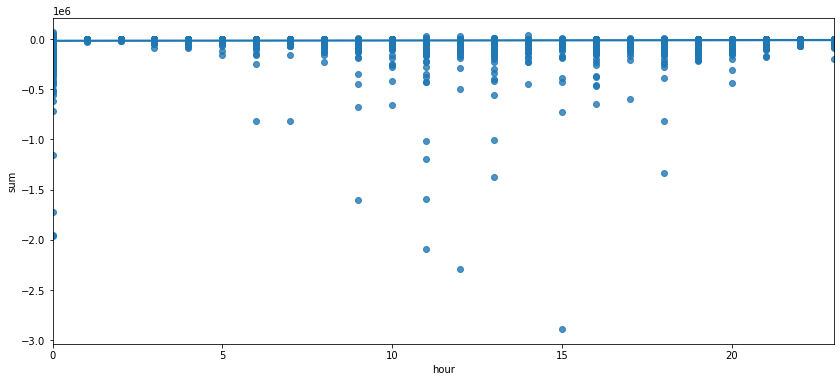

In [44]:
test10=transactions[transactions['category']=='Различные магазины']
plt.figure(figsize=(14,6))
sns.regplot(x=test10['hour'], y=test10['sum'])

<AxesSubplot:xlabel='day of the week', ylabel='sum'>

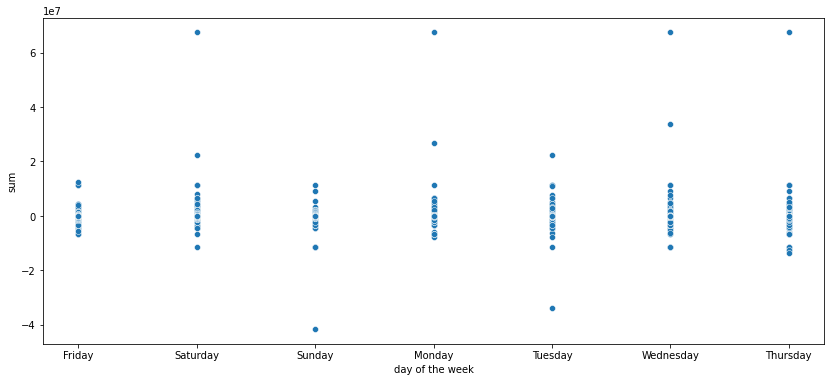

In [45]:
plt.figure(figsize=(14,6))
sns.scatterplot(x=transactions['day of the week'],y=transactions['sum'])

## сумированная сумма на каждый день

<AxesSubplot:xlabel='validdate'>

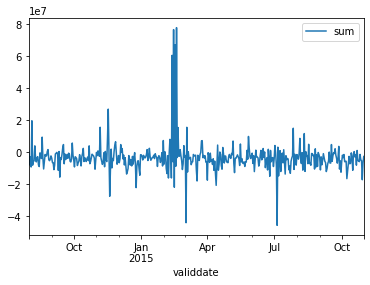

In [46]:
sss=transactions.sort_values(by=['validdate'])
ss=sss.groupby(['validdate'])
s=ss.sum(sum)
s.plot.line( y='sum')


## Туризм

<AxesSubplot:xlabel='validdate'>

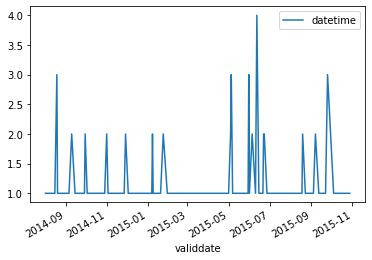

In [47]:
ll=transactions[transactions['code'].isin([7991,7999,4411,4722,7011,7210])]
pd.set_option('display.max_rows', ll.shape[0]+1)
l=ll.groupby(['validdate']).count()
l.sort_values('validdate')
l.plot.line( y='datetime')

## Затраты на супермаркеты



In [48]:
h=transactions.loc[transactions['code'] == 5411]

<AxesSubplot:xlabel='validdate'>

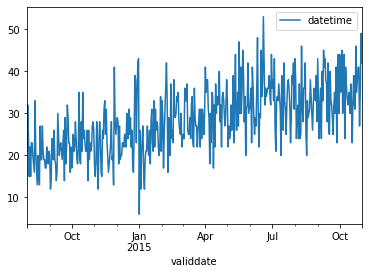

In [49]:
hh=h.groupby(['validdate']).count()
hhh=hh.sort_values('validdate')
hhh.plot.line(y='datetime')

флористика

<AxesSubplot:xlabel='validdate'>

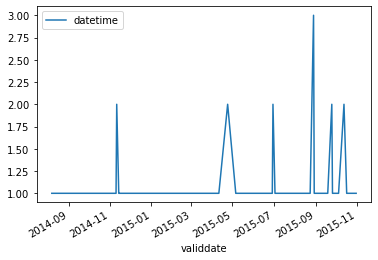

In [50]:
n=transactions.loc[transactions['code'] == 5992]
nn=n.groupby(['validdate']).count()
nnn=nn.sort_values('validdate')
nnn.plot.line(y='datetime')

## RFM


In [51]:
df_recency = transactions.groupby(by='client_id', 
                        as_index=False)['validdate'].max()

In [52]:
recent_date = df_recency['validdate'].max()


In [53]:
df_recency['Recency'] = df_recency['validdate'].apply(lambda x: (recent_date - x).days)


In [54]:
frequency_df = transactions.drop_duplicates().groupby('client_id', as_index=False)['validdate'].count() 
frequency_df.columns = ['client_id', 'Frequency'] 
frequency_df.set_index('client_id') 
frequency_df.head()

client_id  Frequency
0      22899          9
1      27914          4
2      28753         13
3      38084         26
4      49793         21

In [55]:

monetary_df = transactions.groupby(by='client_id', as_index=False)['sum'].sum() 
monetary_df.columns = ['client_id', 'Monetary'] 
monetary_df.head()


client_id    Monetary
0      22899    50847.54
1      27914    74115.21
2      28753 -2589800.29
3      38084   693495.66
4      49793 -1382413.97

In [56]:

rf_df = df_recency.merge(frequency_df, on='client_id') 
rfm_df = rf_df.merge(monetary_df, on='client_id') 
rfm_df.head()

client_id  validdate  Recency  Frequency    Monetary
0      22899 2015-10-16       15          9    50847.54
1      27914 2015-05-20      164          4    74115.21
2      28753 2015-10-08       23         13 -2589800.29
3      38084 2015-10-04       27         26   693495.66
4      49793 2015-10-14       17         21 -1382413.97

In [57]:
rfm_df['R_rank'] = rfm_df['validdate'].rank(ascending=False) 
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True) 
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True) 
  

In [58]:
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100 
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100 
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100 

In [59]:
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True) 
  
rfm_df.head()

client_id  validdate  Recency  Frequency    Monetary  R_rank_norm  F_rank_norm  M_rank_norm
0      22899 2015-10-16       15          9    50847.54    36.266667    42.958333    42.958333
1      27914 2015-05-20      164          4    74115.21    91.691667    18.566667    18.566667
2      28753 2015-10-08       23         13 -2589800.29    47.400000    58.650000    58.650000
3      38084 2015-10-04       27         26   693495.66    51.750000    86.833333    86.833333
4      49793 2015-10-14       17         21 -1382413.97    39.500000    79.416667    79.416667

In [60]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm'] 
rfm_df['RFM_Score'] *= 0.05 
rfm_df = rfm_df.round(2) 
rfm_df[['client_id', 'RFM_Score']].head(7)


client_id  RFM_Score
0      22899       2.10
1      27914       1.48
2      28753       2.85
3      38084       4.08
4      49793       3.67
5      50940       0.85
6      52926       3.09

In [61]:

rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >4.5, "Top Customers",(np.where(rfm_df['RFM_Score'] > 4,"High value Customer", 
(np.where(rfm_df['RFM_Score'] > 3,"Medium Value Customer",np.where(rfm_df['RFM_Score'] > 1.6,'Low Value Customers', 'Lost Customers')))))) 
rfm_df[['client_id', 'RFM_Score', 'Customer_segment']]

client_id  RFM_Score       Customer_segment
0         22899       2.10    Low Value Customers
1         27914       1.48         Lost Customers
2         28753       2.85    Low Value Customers
3         38084       4.08    High value Customer
4         49793       3.67  Medium Value Customer
...         ...        ...                    ...
5995   99900908       1.69    Low Value Customers
5996   99911226       2.39    Low Value Customers
5997   99967537       0.77         Lost Customers
5998   99985917       0.86         Lost Customers
5999   99991245       1.39         Lost Customers

[6000 rows x 3 columns]

In [62]:

transactions['year']=transactions['validdate'].apply(lambda x:x.year)

year2014=transactions[transactions['year']==2014]

year2015=transactions[transactions['year']==2015]

sum2014=year2014.groupby('client_id').sum()['sum']

sum2015=year2015.groupby('client_id').sum()['sum']

finaldata=pd.merge(sum2014, sum2015,  on ='client_id')

finaldata.columns=['2014','2015']
finaldata=finaldata[finaldata['2014']<15000000]
finaldata=finaldata[finaldata['2015']<15000000]

[[   -99087.87370017   -131547.06632103]
 [ -5871901.6475     -26300758.1925    ]
 [  -919448.27273973  -5683047.27671233]]


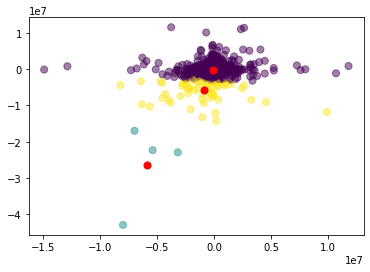

In [63]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



kmeans = KMeans(n_clusters=3).fit(finaldata)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(finaldata['2014'], finaldata['2015'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [64]:
transactions

client_id      datetime  code  type        sum  day      time  hour  target  validdate                        category day of the week  month  year
92184    91212486    0 18:07:24  6010  7070   44918.32    0  18:07:24    18     0.0 2014-08-01  финансовые и денежные переводы          Friday      8  2014
66542    66875893    0 16:27:28  5411  1010  -18618.64    0  16:27:28    16     1.0 2014-08-01              Различные магазины          Friday      8  2014
78805    70780820    0 13:39:56  6010  7070   18663.56    0  13:39:56    13     1.0 2014-08-01  финансовые и денежные переводы          Friday      8  2014
2481      3323243    0 10:32:40  6011  2010  -11229.58    0  10:32:40    10     1.0 2014-08-01  финансовые и денежные переводы          Friday      8  2014
128750   45421659    0 10:19:12  6011  2010 -112295.79    0  10:19:12    10     1.0 2014-08-01  финансовые и денежные переводы          Friday      8  2014
...           ...           ...   ...   ...        ...  ...       ...   ...     ...        ...                             ...             ...    ...   ...
11652    29041434  456 09:03:24  6010  7070   50622.94  456  09:03:24     9     1.0 2015-10-31  финансовые и денежные переводы        Saturday     10  2015
105146   20200542  456 15:27:56  5661  1010  -89904.01  456  15:27:56    15     0.0 2015-10-31                          Одежда        Saturday     10  2015
65463      168767  456 19:18:50  5411  1010   -4716.42  456  19:18:50    19     1.0 2015-10-31              Различные магазины        Saturday     10  2015
57736    78490146  456 13:36:53  4814  1030   -5232.98  456  13:36:53    13     0.0 2015-10-31                          Звонки        Saturday     10  2015
105557   96998453  456 00:00:00  5411  1110   -4020.19  456  00:00:00     0     0.0 2015-10-31              Различные магазины        Saturday     10  2015

[91826 rows x 14 columns]

## Elbow plot on codes.csv

In [71]:
list_of_codes=list(codes['code_description'])

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(list_of_codes)


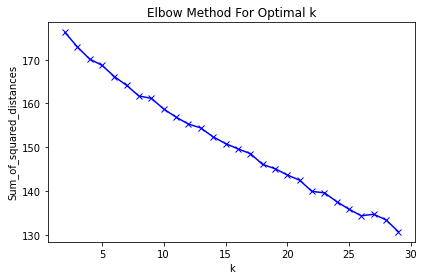

In [74]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,30)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.tight_layout()

## conclusion

Finally, we edited the Dataframe and normalized the data based on this data we analyzed the information about the transactions. We found the correlation between them and their distortion and were able to predict data that did not exist. And created new features.